# Statistical Testing Guide
You are given a dataset and expected to perform some statistical testing. 

Let us have a look at the most common statistical tests:

|Test|Description|
|---|---|
|T-Test|Compare the means of two groups and determine significance between them|
|ANOVA|Compare means of three or more groups determine significance between them|
|Chi-squared test|check significant association between two categorical variables, used to test hypotheses|
|Regression analysis|model relationship between dependent variable and independent variable(s), predict value|
|Correlation analysis|Measure relationship between two variables|

### Load packages

In [3]:
# general packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# statistical packages
# two-sample t-test
from scipy.stats import ttest_ind

# ANOVA
from statsmodels.formula.api import ols

# chi-squared test
from scipy.stats import chi2_contingency

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# Pearson correlation coefficient
from scipy.stats import pearsonr

# Spearman rank correlation coefficient
from scipy.stats import spearmanr

### Two-sample T-Test

Generate data

In [19]:
# Set the seed for the random number generator
np.random.seed(42)

# Generate data for group 1 with a mean of 10 and a standard deviation of 2
data1 = np.random.normal(10, 2, size=50)

# Generate data for group 2 with a mean of 12 and a standard deviation of 3
data2 = np.random.normal(12, 3, size=60)

In [20]:
print(f'First data group has the following first datapoints:\n{data1[:5]}')
print(f'Second data group has the following first datapoints:\n{data2[:5]}')

First data group has the following first datapoints:
[10.99342831  9.7234714  11.29537708 13.04605971  9.53169325]
Second data group has the following first datapoints:
[12.97225191 10.84475316  9.969234   13.83502887 15.09299857]


In [22]:
# Perform the t-test
t_stat, p = ttest_ind(data1, data2)

# Print the results
print('t-statistics: {}\np-value: {} '.format(t_stat, p))

t-statistics: -5.620237794392159
p-value: 1.5049918582392246e-07 


t-statistics describes a significant difference of the two means

$p < \alpha = 0.05$: That means we can reject the null hypothesis in favor of the alternative hypothesis which is that there is a significant difference in the means of the two groups

**In general you can do the following steps in order to perform a two-sample t-test**:
1. Load the data
2. Identify the two groups for the t-test
3. Inspect and clean these groups (ttest_ind function cannot handle missing values)
4. Perform the t-test

```python
# Perform the t-test
t_stat, p = ttest_ind(group1,group2)

# Print the results
print('t-statistics: {}\np-value: {} '.format(t_stat, p))
```

### ANOVA (one-way)

Generate data

In [23]:
# Set the seed for the random number generator
np.random.seed(42)

# Generate data for group 1 with a mean of 10 and a standard deviation of 2
data1 = np.random.normal(10, 2, size=50)

# Generate data for group 2 with a mean of 12 and a standard deviation of 3
data2 = np.random.normal(12, 3, size=60)

# Generate data for group 3 with a mean of 15 and a standard deviation of 4
data3 = np.random.normal(15, 4, size=70)

# Combine the data into a single array
data = np.concatenate([data1, data2, data3])

# Create a list of labels indicating the group for each data point
labels = ['group1'] * len(data1) + ['group2'] * len(data2) + ['group3'] * len(data3)

<AxesSubplot: >

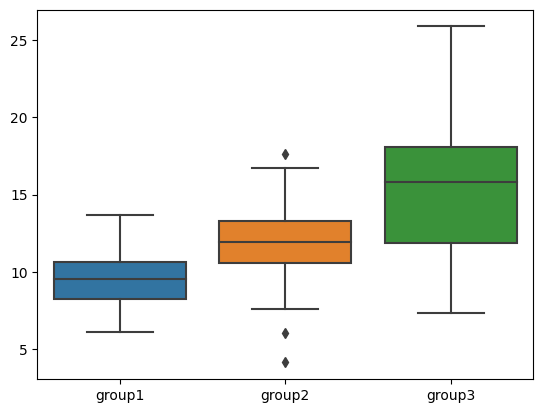

In [25]:
# Create a boxplot of the data
sns.boxplot(x=labels, y=data)

In [33]:
# Convert the data and labels to a Pandas DataFrame
df = pd.DataFrame({'data': data, 'group': labels})

# Create a model using the ols function and fit the model
model = ols('data ~ group', data=df).fit()

# Print a summary
print(model.summary())

# Extract the ANOVA table
table = sm.stats.anova_lm(results, typ=2)

# Print the ANOVA table
print(table)

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     53.30
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           7.61e-19
Time:                        14:59:06   Log-Likelihood:                -458.19
No. Observations:                 180   AIC:                             922.4
Df Residuals:                     177   BIC:                             931.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.5491      0.440     

### ANOVA (two-way)

Generate data

In [93]:
# Load the data into a Pandas DataFrame
leng = [4.2, 11.5, 7.3, 5.8, 6.4, 10, 11.2, 11.2, 5.2, 7, 16.5, 16.5, 15.2, 17.3, 22.5, 17.3, 13.6, 14.5, 18.8, 15.5, 23.6, 18.5, 33.9, 25.5, 26.4, 32.5, 26.7, 21.5, 23.3, 29.5, 15.2, 21.5, 17.6, 9.7, 14.5, 10, 8.2, 9.4, 16.5, 9.7, 19.7, 23.3, 23.6, 26.4, 20, 25.2, 25.8, 21.2, 14.5, 27.3, 25.5, 26.4, 22.4, 24.5, 24.8, 30.9, 26.4, 27.3, 29.4, 23]
supp = ['VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'VC', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'OJ', 'VC', 'OJ']
dose = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

print('{}, {}, {}'.format(len(leng),len(supp),len(dose)))

df = pd.DataFrame({'len': leng, 'supp': supp,'dose': dose})

60, 60, 60


<AxesSubplot: xlabel='dose', ylabel='len'>

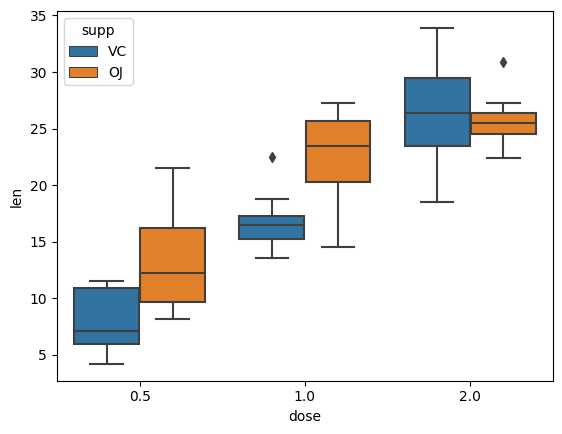

In [95]:
# Create a boxplot of the data, grouped by both factors
sns.boxplot(data=df, x='dose', y='len', hue='supp')


In [97]:
# Create a model using the ols function
model = ols('leng ~ dose * supp', data=df)

# Fit the model and print a summary
results = model.fit()
print(results.summary())

# Extract the ANOVA table
table = sm.stats.anova_lm(results)

# Print the ANOVA table
print(table)

                            OLS Regression Results                            
Dep. Variable:                   leng   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     50.28
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           6.73e-16
Time:                        16:00:52   Log-Likelihood:                -167.51
No. Observations:                  60   AIC:                             343.0
Df Residuals:                      56   BIC:                             351.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.6728      1.597     

### Chi-squared test

Imagine you are a market researcher who is interested in understanding the relationship between the type of product a person buys and their income level. You conduct a survey and ask 100 people to indicate the type of product they most recently purchased (either a low-priced product or a high-priced product) and their income level (either low, medium, or high). You record the results of the survey in the following contingency table:

|Income Level|Low-priced product|High-priced product|
|---|---|---|
|Low|20|10|
|Medium|30|20|
|High|10|40|

In [106]:
# Load the data into a NumPy array
data = np.array([[20, 10],
                 [30, 20],
                 [10, 40]])

In [109]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(data)

# Print the results of the test
print(f'Chi-squared statistic: {chi2:.3f}')
print(f'p-value: {p:.6f}')

Chi-squared statistic: 22.698
p-value: 0.000012


The p-value of $p=0.000012$ means that the observed relationship between income level and type of product purchased is unlikely to be by chance. Thus, you can conclude that there is a relationship between these variables.

The chi-squared statistic $chi^2=22.698$ indicates a relatively strong relationship between income level and type of product purchased. In general, the larger $chi^2$, the stronger the relationship.